In [16]:
!pip install altair vega
!pip install panel
!pip install altair_widgets

In [35]:
import pandas as pd
m = 10
data = pd.DataFrame({
    'DATE': pd.date_range('2019-01-01', freq='D', periods=m),
    'REVENUE': np.random.randn(m),
    'COST': np.random.randn(m),
}).melt('DATE', var_name='KEY', value_name='VALUE')


In [36]:
data.head()

,DATE,KEY,VALUE
0,2019-01-01,REVENUE,2.233245
1,2019-01-02,REVENUE,-2.586773
2,2019-01-03,REVENUE,-0.701192
3,2019-01-04,REVENUE,0.531897
4,2019-01-05,REVENUE,1.433004


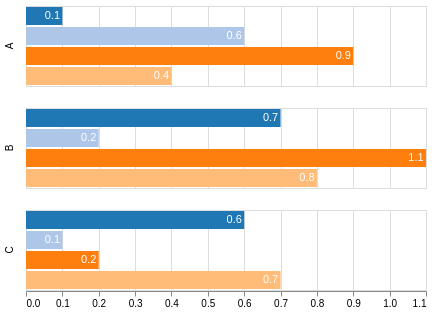

In [42]:
import altair as alt
import pandas as pd

data = pd.DataFrame([
    {"category":"A", "position":0, "value":0.1},
    {"category":"A", "position":1, "value":0.6},
    {"category":"A", "position":2, "value":0.9},
    {"category":"A", "position":3, "value":0.4},
    {"category":"B", "position":0, "value":0.7},
    {"category":"B", "position":1, "value":0.2},
    {"category":"B", "position":2, "value":1.1},
    {"category":"B", "position":3, "value":0.8},
    {"category":"C", "position":0, "value":0.6},
    {"category":"C", "position":1, "value":0.1},
    {"category":"C", "position":2, "value":0.2},
    {"category":"C", "position":3, "value":0.7}
])

text = alt.Chart(data).mark_text(dx=-10, color='white').encode(
    x=alt.X('value:Q', title=None),
    y=alt.Y('position:O', axis=None),
    text='value:Q'
)

bars = text.mark_bar().encode(
    color=alt.Color('position:O', legend=None, scale=alt.Scale(scheme='category20')),
)

(bars + text).facet(
    row='category:N'
).configure_header(
    title=None
)

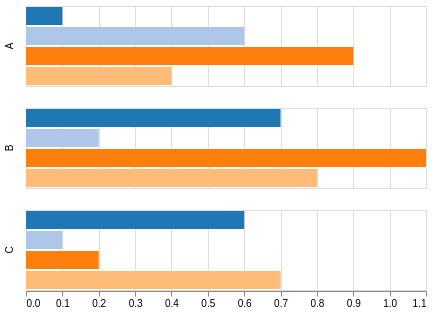

In [74]:

data = pd.DataFrame([
    {"category":"A", "position":0, "value":0.1},
    {"category":"A", "position":1, "value":0.6},
    {"category":"A", "position":2, "value":0.9},
    {"category":"A", "position":3, "value":0.4},
    {"category":"B", "position":0, "value":0.7},
    {"category":"B", "position":1, "value":0.2},
    {"category":"B", "position":2, "value":1.1},
    {"category":"B", "position":3, "value":0.8},
    {"category":"C", "position":0, "value":0.6},
    {"category":"C", "position":1, "value":0.1},
    {"category":"C", "position":2, "value":0.2},
    {"category":"C", "position":3, "value":0.7}
])

bars = alt.Chart(data).mark_bar().encode(
    x=alt.X('value:Q', title=None),
    y=alt.Y('position:O', axis=None),
    color=alt.Color('position:O', legend=None, scale=alt.Scale(scheme='category20')),
)

(bars).facet(
    row='category:N'
).configure_header(
    title=None
)

In [134]:
# import pandas as pd
# m = 100
# data = pd.DataFrame({
#     'DATE': pd.date_range('2019-01-01', freq='D', periods=m),
#     'REVENUE': np.random.randn(m),
#     'COST': np.random.randn(m),
# }).melt('DATE', var_name='KEY', value_name='VALUE')

# bars = alt.Chart(data).mark_bar().encode(
#     x=alt.X('KEY:N'),
#     y=alt.Y('VALUE:Q'),
#     color=alt.Color('KEY:N'),
#     column=alt.Column('DATE:T', axis=None)
# )



        DATE      KEY     VALUE
0 2019-01-01  REVENUE  0.492658
1 2019-01-02  REVENUE  0.992155
2 2019-01-03  REVENUE  1.020049
3 2019-01-04  REVENUE -0.949393
4 2019-01-05  REVENUE -0.408277


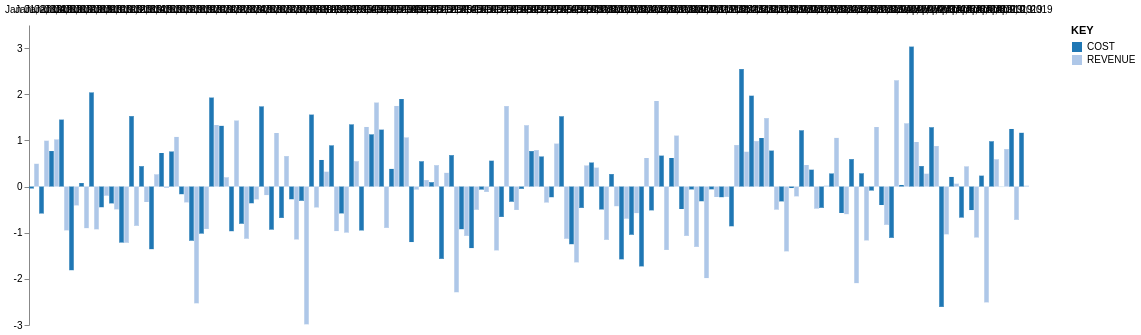

In [135]:
import altair as alt
import pandas as pd
m = 100
data = pd.DataFrame({
    'DATE': pd.date_range('2019-01-01', freq='D', periods=m),
    'REVENUE': np.random.randn(m),
    'COST': np.random.randn(m),
}).melt('DATE', var_name='KEY', value_name='VALUE')

print(data.head())

bars = alt.Chart(data, width=10).mark_bar().encode(
    y=alt.Y('VALUE:Q', title=None),
    x=alt.X('KEY:O', axis=None),
    color=alt.Color('KEY:O', scale=alt.Scale(scheme='category20')),
    tooltip=['DATE', 'KEY', 'VALUE'],
)

(bars).facet(
    column=alt.Column('DATE:T'),
    align="none",
    spacing=0,
).configure_header(
    title=None
).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
)

In [104]:
alt.Chart?

Init signature:
alt.Chart(
    data=Undefined,
    encoding=Undefined,
    mark=Undefined,
    width=Undefined,
    height=Undefined,
    **kwargs,
)
Docstring:     
Create a basic Altair/Vega-Lite chart.

Although it is possible to set all Chart properties as constructor attributes,
it is more idiomatic to use methods such as ``mark_point()``, ``encode()``,
``transform_filter()``, ``properties()``, etc. See Altair's documentation
for details and examples: http://altair-viz.github.io/.

Attributes
----------
data : Data
    An object describing the data source
mark : AnyMark
    A string describing the mark type (one of `"bar"`, `"circle"`, `"square"`, `"tick"`,
     `"line"`, * `"area"`, `"point"`, `"rule"`, `"geoshape"`, and `"text"`) or a
     MarkDef object.
encoding : FacetedEncoding
    A key-value mapping between encoding channels and definition of fields.
autosize : anyOf(AutosizeType, AutoSizeParams)
    Sets how the visualization size should be determined. If a string, should

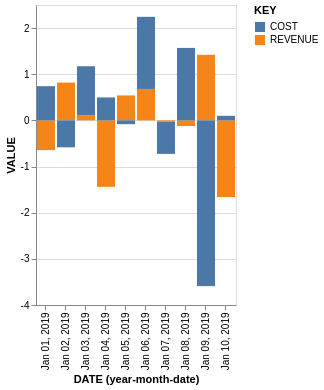

In [66]:
import altair as alt

alt.Chart(data).mark_bar().encode(
    x='yearmonthdate(DATE):O',
    y='VALUE',
    color='KEY',
    tooltip=['KEY', 'VALUE'],
)

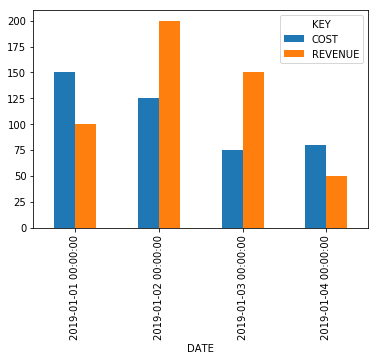

In [3]:
%matplotlib inline
data.set_index(['DATE', 'KEY'])['VALUE'].unstack('KEY').plot(kind='bar')

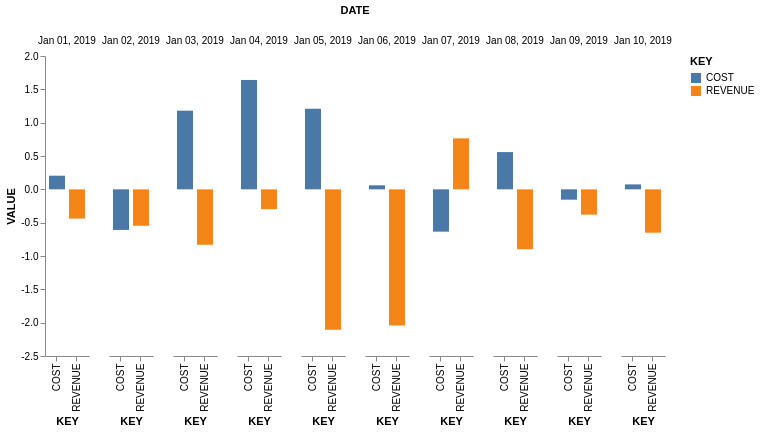

In [6]:
import altair as alt
import pandas as pd



alt.Chart(data).mark_bar().encode(
    x=alt.X('KEY', scale=alt.Scale(padding=0.2)),
    y=alt.Y('VALUE'),
    color='KEY',
    column=alt.Column('DATE:T'),
    tooltip=['KEY', 'VALUE'],
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_scale()

In [5]:
from bokeh.core.properties import value
from bokeh.io import show, output_file, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_notebook()

# output_file("bar_dodged.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

source = ColumnDataSource(data=data)

p = figure(x_range=fruits, y_range=(0, 10), plot_height=350, title="Fruit Counts by Year",
           toolbar_location=None, tools="")

p.vbar(x=dodge('fruits', -0.25, range=p.x_range), top='2015', width=0.2, source=source,
       color="#c9d9d3", legend=value("2015"))

p.vbar(x=dodge('fruits',  0.0,  range=p.x_range), top='2016', width=0.2, source=source,
       color="#718dbf", legend=value("2016"))

p.vbar(x=dodge('fruits',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
       color="#e84d60", legend=value("2017"))
`
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

Loading BokehJS ...